(small-samples-notebook)=
# Modellizzazione di Piccoli Campioni

Questo capitolo si focalizza sui modelli SEM in contesti dove i campioni sono di piccole dimensioni, una situazione che introduce sfide significative nell'utilizzo di tecniche statistiche multivariate. È noto che la maggior parte dei metodi di stima e inferenza in SEM sono basati su presupposti asintotici, cioè assumono l'esistenza di campioni casuali di grandi dimensioni. Tuttavia, in campioni più piccoli, come quelli con N < 200, emergono problematiche specifiche: i metodi iterativi possono non raggiungere la convergenza, possono verificarsi soluzioni non valide a causa dei cosiddetti casi di Heywood o altri risultati anomali difficili da interpretare, e le stime dei parametri possono risultare fortemente distorte.

In risposta a queste difficoltà, alcuni ricercatori preferiscono evitare l'uso di SEM in campioni ridotti, orientandosi verso metodi più semplici. Tuttavia, è importante riconoscere che il bias legato alla dimensione ridotta del campione può essere ancora più pronunciato in tecniche come la regressione multipla o l'analisi di percorso con variabili manifeste, specialmente quando non si tiene conto dell'errore di misurazione. 

Questo capitolo si propone di esplorare diverse strategie per superare le sfide poste dall'uso della SEM in campioni di piccole dimensioni. Saranno presentati approcci per la specificazione del modello, la stima dei parametri e la valutazione dell'adattamento del modello. Alcune di queste metodologie sono note da tempo nel campo della statistica, mentre altre, come strategie di stima particolari e statistiche di test specifiche per campioni di dimensioni limitate, sono di più recente introduzione. L'efficacia di queste tecniche sarà illustrata attraverso l'analisi di un modello di fattore comune in un campione di piccole dimensioni.

In [1]:
source("../_common.R")
suppressPackageStartupMessages({
    library("lavaan")
    library("semPlot")
    library("semTools")
    library("knitr")
    library("markdown")
    library("patchwork")
    library("lme4")
    library("here")
    library("MIIVsem")
})
set.seed(42)

L'analisi di modelli a fattori comuni in campioni di piccole dimensioni si scontra con sfide notevoli, tra cui l'insorgenza di soluzioni inammissibili o il mancato raggiungimento della convergenza nelle stime iterative. Per superare questi ostacoli, {cite:t}`kline2023principles` propone diverse strategie, adatte a mitigare questi problemi:

1. **Selezione di Indicatori con Elevate Caratteristiche Psicometriche**: È consigliabile utilizzare indicatori che mostrino eccellenti proprietà psicometriche, idealmente con carichi standardizzati superiori a .70 per gli indicatori continui. Questa pratica riduce il rischio di incorrere in casi di Heywood.

2. **Applicazione di Restrizioni di Uguaglianza sui Carichi Non Standardizzati**: Imponendo vincoli di uguaglianza sulle saturazioni degli indicatori relativi allo stesso fattore si possono evitare soluzioni inammissibili. Questo approccio è particolarmente valido quando gli indicatori sono sulla stessa scala. Un'alternativa valida consiste nel fissare le saturazioni degli indicatori dello stesso fattore a valori costanti non nulli, che riflettano le variazioni nelle loro deviazioni standard.

3. **Utilizzo di Metodi di Stima Locale**: L'adozione di metodi che analizzano una singola equazione per volta, come il MIIV-2SLS (variabili strumentali modello-implicate con metodo dei minimi quadrati in due fasi), elimina i problemi di convergenza tipici dei metodi iterativi. Questa tecnica, che non dipende dall'assunzione di normalità, può isolare in modo più efficace gli effetti dell'errore di specificazione rispetto a metodi simultanei come il Maximum Likelihood (ML).

4. **Approccio Structural-After-Measurement (SAM)**: In questo metodo, la stima dei parametri del modello di misurazione avviene prima, seguita dalla stima dei parametri strutturali, mantenendo fissi i parametri di misurazione stimati inizialmente. Questo processo bifasico permette un isolamento più accurato degli errori di specificazione nel modello di misurazione.

5. **SEM Basato su Compositi per Modelli Complessi in Campioni Piccoli**: L'utilizzo di metodi basati su compositi (cioè, combinazioni lineari di variabili osservate) può fornire risultati per modelli complessi che, con il SEM tradizionale, richiederebbero campioni molto più ampi. Tuttavia, è importante notare che anche i risultati del SEM basato su compositi possono essere distorti in campioni piccoli.

6. **Analisi di Dati a Livello di Item in Campioni Piccoli**: Affrontare l'analisi di modelli con item come indicatori può essere complesso in campioni ridotti, specialmente quando si utilizzano metodi per dati ordinali anziché continui. Un'alternativa efficace è il parceling, che consiste nell'aggregare due o più item in pacchetti, sommando o mediando i valori degli item, e utilizzando questi pacchetti come indicatori. Sebbene il parceling possa ridurre la varianza dell'errore, è importante considerare le sue restrizioni e il fatto che i risultati possono variare notevolmente a seconda delle scelte fatte dal ricercatore durante l'analisi.

## Parceling 

Consideriamo un questionario di 120 item diviso in tre gruppi distinti di 40 item ciascuno, ognuno mirato a misurare un'area specifica. In un campione di 150 partecipanti, un'analisi fattoriale confermativa (CFA) con tre fattori e 40 indicatori per fattore risultante in 120 indicatori totali, può presentare sfide notevoli a causa della dimensione del campione. Per affrontare questi problemi, il ricercatore può suddividere ogni gruppo di 40 item in 4 gruppi minori (o pacchetti) di 10 item ciascuno, sommando i punteggi all'interno di ogni pacchetto. Questi punteggi aggregati sostituiscono poi gli item singoli come indicatori in un modello CFA a 3 fattori con 12 indicatori (4 pacchetti per fattore). Se i pacchetti hanno una distribuzione normale, si può ricorrere al metodo dei minimi quadrati (ML); altrimenti, si può utilizzare un estimatore ML robusto.

Rioux et al. (2020) evidenziano ulteriori vantaggi del parceling, oltre alla semplice riduzione del numero di indicatori. I punteggi aggregati tendono a presentare intervalli più frequenti, ristretti e uniformi, avvicinandosi più a una scala di misurazione continua rispetto alle singole risposte, spesso codificate come valori discreti su una scala Likert. Inoltre, i punteggi aggregati sono generalmente più precisi e affidabili rispetto alle singole risposte. Anche i rapporti tra varianza comune e varianza unica, e i livelli di comunalità, sono tipicamente maggiori nei pacchetti rispetto agli item singoli, aiutando a mitigare problemi di stima in campioni piccoli. L'analisi di pacchetti può anche ridurre l'impatto di errori correlati o di carichi di indicatori su più fattori dovuti all'errore di campionamento.

Tuttavia, il parceling presenta anche significative limitazioni. Esistono diverse metodologie per la creazione dei pacchetti, da quelle casuali a quelle basate su criteri logici, e la scelta può influenzare i risultati. Il parceling non è consigliabile se non si può assumere l'unidimensionalità degli item all'interno di ciascun pacchetto, poiché analizzare punteggi aggregati di set di item multidimensionali può distorcere i risultati. L'opzione più semplice è utilizzare misure consolidate con set di item noti a priori per essere unidimensionali, anche se tali condizioni ideali sono rare. Un'alternativa è verificare empiricamente l'unidimensionalità adattando modelli CFA a singolo fattore per gli item all'interno di ogni pacchetto. Tuttavia, vi sono problemi con questo approccio: dati generati da modelli multidimensionali possono apparire come coerenti con un modello a singolo fattore a causa dell'errore di campionamento e la ridefinizione dei pacchetti può sfruttare quest'errore, specialmente se si analizza un modello CFA modificato con gli stessi dati. 

## Stimatore MIIV-2SLS

Lo stimatore MIIV-2SLS (Model Implied Instrumental Variable Two Stage Least Squares) è un metodo avanzato utilizzato nei modelli SEM, particolarmente utile nell'analisi di piccoli campioni.

Una variabile strumentale è una variabile che non è correlata direttamente con il termine di errore in un'equazione di regressione, ma è correlata con una o più variabili indipendenti in quella equazione. Un *Model Implied Instrumental Variable* (MIIV) è una variabile strumentale che viene identificata o derivata dal modello di equazione strutturale stesso.

Come suggerito dal nome, il MIIV-2SLS opera in due fasi. Nella prima fase, si utilizzano le MIIV per stimare le variabili endogene (dipendenti). Nella seconda fase, queste stime vengono utilizzate per calcolare le relazioni causali finali nel modello SEM. A differenza di altri metodi SEM, il MIIV-2SLS non richiede grandi campioni per produrre stime affidabili. È dunque particolarmente adatto per analisi con piccoli campioni. Per i piccoli campioni, altri metodi SEM possono introdurre bias significativi nelle stime; il MIIV-2SLS riduce questo problema.

## SEM in un Piccolo Campione

{cite:t}`kline2023principles` discute uno studio in cui è stato applicato un modello CFA a due fattori ad un campione di 103 donne, le quali hanno compilato questionari su esperienze di origine familiare e adattamento coniugale (Sabatelli e Bartle-Haring, 2003). 

In [2]:
# input the correlations in lower diagnonal form
sabatelliLower.cor <- "
 1.000
  .740 1.000
  .265  .422 1.000
  .305  .401  .791 1.000
  .315  .351  .662  .587 1.000 "

# name the variables and convert to full correlation matrix
sabatelli.cor <- lavaan::getCov(sabatelliLower.cor, names = c(
    "problems", "intimacy", "father", "mother", "both"
    )
)

# add the standard deviations and convert to covariances
sabatelli.cov <- lavaan::cor2cov(sabatelli.cor, sds = c(
    32.936, 22.749, 13.390, 13.679, 14.382
    )
)

Il modello proposto dagli autori è specificato di seguito:

In [3]:
sabatelli_model <- "
    # common factors
    # loading for intimacy constrained to equal .691
    Marital =~ problems + intimacy
    FOE =~ father + mother + both
"

In riferimento al modello specificato sopra, la soluzione fornita da `lavaan` risulta inammissibile a causa di un caso di Heywood, evidenziato da una varianza d'errore negativa per la variabile "intimità".

In [4]:
original <- lavaan::sem(sabatelli_model,
    sample.cov = sabatelli.cov,
    sample.nobs = 103
)

Warning message in lav_object_post_check(object):
“lavaan WARNING: some estimated ov variances are negative”


In [5]:
lavaan::summary(original,
    fit.measures = TRUE, standardized = TRUE,
    rsquare = TRUE
) |> print()

lavaan 0.6.17 ended normally after 141 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        11

  Number of observations                           103

Model Test User Model:
                                                      
  Test statistic                                 4.688
  Degrees of freedom                                 4
  P-value (Chi-square)                           0.321

Model Test Baseline Model:

  Test statistic                               271.302
  Degrees of freedom                                10
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.997
  Tucker-Lewis Index (TLI)                       0.993

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)              -2087.964
  Loglikelihood unrestricted model (H1)      -2

Per ovviare ad un tale problema, in una nuova analisi del modello di adattamento coniugale è stato applicato un vincolo specifico ai carichi non standardizzati degli indicatori. A causa delle differenze sostanziali nelle metriche tra le due variabili, ovvero "intimacy" (con una deviazione standard di 22.749) e "problems" (con una deviazione standard di 32.936), sono state fissate le seguenti saturazioni fattoriali: il carico per la variabile "problemi" è stato fissato a 1, mentre il carico per la variabile "intimità" è stato fissato a 0.691. Questi valori sono stati calcolati in modo da riflettere proporzionalmente la differenza nelle deviazioni standard tra le due variabili.

In [6]:
# analysis with constrained loadings for indicators of marital adjustment
# model df = 5

# standard deviations for both indicators
# of the marital factor are listed next
# intimacy, sd = 22.749
# problems, sd = 32.936
# ratio = 22.749/32.936 = .691

# specify model with constrained loadings for problems, intimacy

proportional.model <- "
    # common factors
    # loading for intimacy constrained to equal .691
    Marital =~ 1*problems + .691*intimacy
    FOE =~ father + mother + both 
"

In [7]:
proportional <- lavaan::sem(proportional.model,
    sample.cov = sabatelli.cov,
    sample.nobs = 103
)

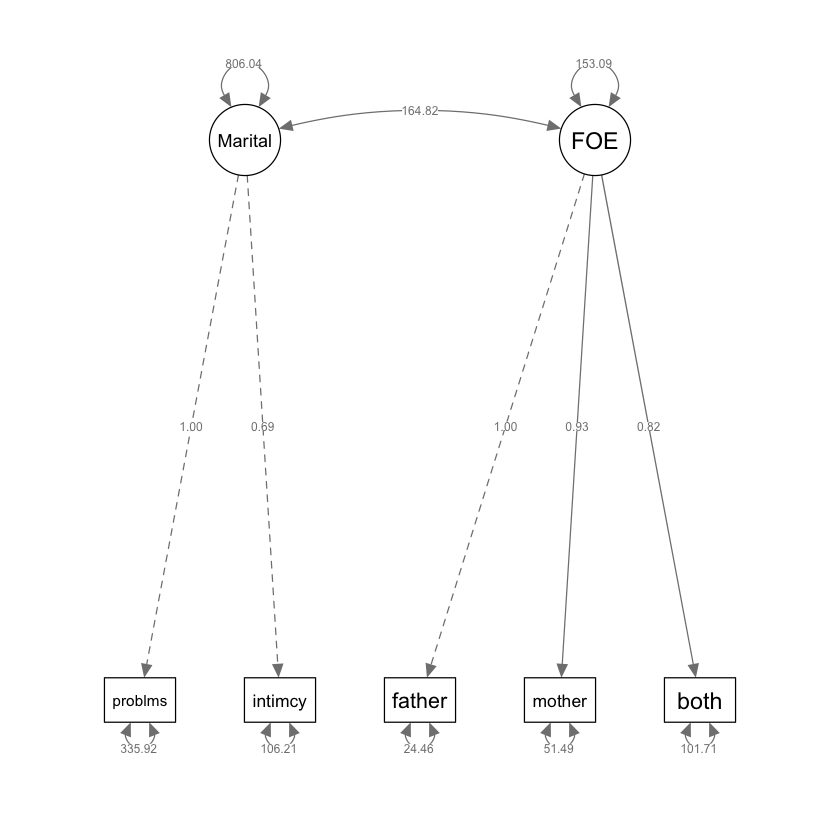

In [8]:
semPlot::semPaths(proportional,
    what = "col", whatLabels = "par", style = "mx", 
    layout = "tree2", nCharNodes = 7,
    shapeMan = "rectangle", sizeMan = 8, sizeMan2 = 5
)

In [9]:
lavaan::summary(proportional,
    fit.measures = TRUE, standardized = TRUE,
    rsquare = TRUE
) |> print()

lavaan 0.6.17 ended normally after 110 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        10

  Number of observations                           103

Model Test User Model:
                                                      
  Test statistic                                 8.449
  Degrees of freedom                                 5
  P-value (Chi-square)                           0.133

Model Test Baseline Model:

  Test statistic                               271.302
  Degrees of freedom                                10
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.987
  Tucker-Lewis Index (TLI)                       0.974

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)              -2089.845
  Loglikelihood unrestricted model (H1)      -2

In [10]:
fitMeasures(proportional, c("chisq", "df", "cfi", "tli", "rmsea", "srmr")) |>
    print()

chisq    df   cfi   tli rmsea  srmr 
8.449 5.000 0.987 0.974 0.082 0.045 


In [11]:
lavaan::parameterEstimates(proportional) |> print()

        lhs op      rhs     est      se      z pvalue ci.lower ci.upper
1   Marital =~ problems   1.000   0.000     NA     NA    1.000    1.000
2   Marital =~ intimacy   0.691   0.000     NA     NA    0.691    0.691
3       FOE =~   father   1.000   0.000     NA     NA    1.000    1.000
4       FOE =~   mother   0.935   0.091 10.279  0.000    0.757    1.113
5       FOE =~     both   0.821   0.100  8.235  0.000    0.625    1.016
6  problems ~~ problems 335.923  80.080  4.195  0.000  178.970  492.877
7  intimacy ~~ intimacy 106.214  34.373  3.090  0.002   38.843  173.584
8    father ~~   father  24.457  11.060  2.211  0.027    2.779   46.134
9    mother ~~   mother  51.489  11.730  4.389  0.000   28.498   74.481
10     both ~~     both 101.712  16.070  6.329  0.000   70.216  133.208
11  Marital ~~  Marital 806.040 132.946  6.063  0.000  545.471 1066.608
12      FOE ~~      FOE 153.095  26.669  5.741  0.000  100.825  205.365
13  Marital ~~      FOE 164.822  42.788  3.852  0.000   80.959  

In [12]:
lavaan::standardizedSolution(proportional) |> print()

        lhs op      rhs est.std    se      z pvalue ci.lower ci.upper
1   Marital =~ problems   0.840 0.036 23.439  0.000    0.770    0.910
2   Marital =~ intimacy   0.885 0.037 24.040  0.000    0.813    0.957
3       FOE =~   father   0.929 0.035 26.779  0.000    0.861    0.997
4       FOE =~   mother   0.850 0.040 21.126  0.000    0.771    0.929
5       FOE =~     both   0.710 0.055 12.800  0.000    0.601    0.818
6  problems ~~ problems   0.294 0.060  4.884  0.000    0.176    0.412
7  intimacy ~~ intimacy   0.216 0.065  3.317  0.001    0.088    0.344
8    father ~~   father   0.138 0.064  2.139  0.032    0.012    0.264
9    mother ~~   mother   0.278 0.068  4.065  0.000    0.144    0.412
10     both ~~     both   0.497 0.079  6.313  0.000    0.342    0.651
11  Marital ~~  Marital   1.000 0.000     NA     NA    1.000    1.000
12      FOE ~~      FOE   1.000 0.000     NA     NA    1.000    1.000
13  Marital ~~      FOE   0.469 0.091  5.177  0.000    0.292    0.647


Nonostante gli indici di bontà di adattamento siano eccellenti, la potenza di questa analisi statistica risulta estremamente limitata. Per valutare questa limitazione, è possibile utilizzare la funzione `semTools::findRMSEAsamplesize()`. Questa funzione calcola la dimensione del campione necessaria per rilevare una differenza significativa tra RMSEA_0 e RMSEA_A, considerando un modello con `df` gradi di libertà.

Per esempio, se desideriamo distinguere tra RMSEA_0=0.05 e RMSEA_A=0.10 utilizzando il modello attuale con 5 gradi di libertà, la funzione ci indica che sono necessarie 561 osservazioni per ottenere una potenza statistica di 0.8:

In [13]:
semTools::findRMSEAsamplesize(0.05, .10, 5, .80, .05, 1)

[1] 561

Per creare un grafico che rappresenti la potenza statistica per rilevare la differenza tra RMSEA_0=0.05 e RMSEA_A=0.10 (utilizzati qui come esempio) al variare della dimensione del campione, è possibile seguire la seguente procedura:

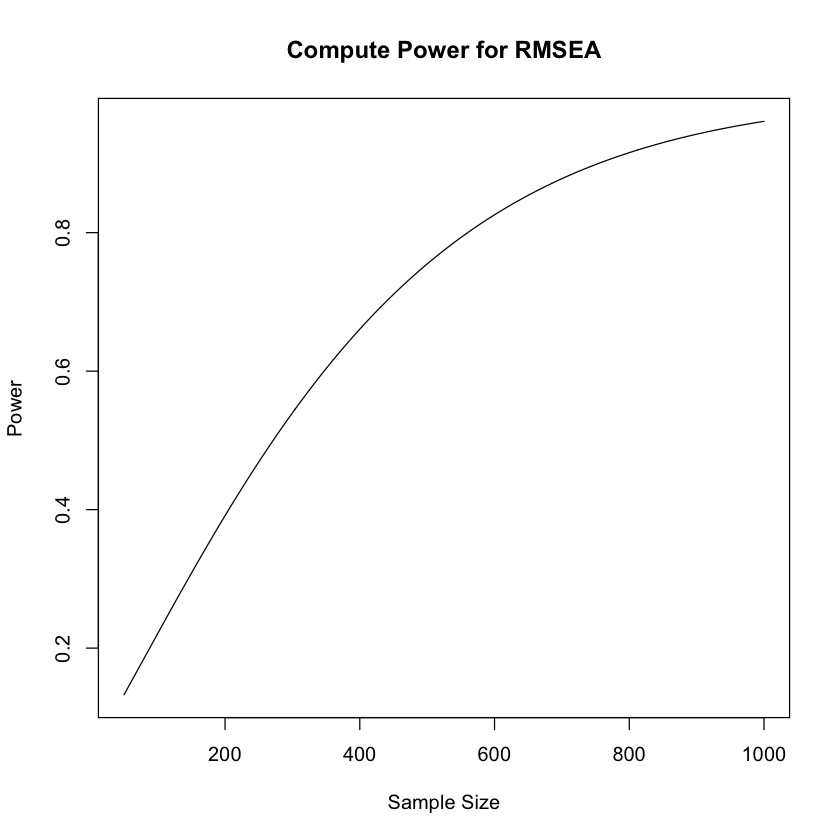

In [14]:
semTools::plotRMSEApower(rmsea0 = .05, rmseaA = .10, df = 5, 50, 1000)

Questa analisi di potenza indica che la dimensione del campione utilizzato ($n$ = 103) è del tutto inadeguata.

Per migliorare il nostro giudizio sull'adattamento del modello consideriamo l'analisi dei residui.

In [15]:
lavaan::residuals(proportional, type = "standardized.mplus") |> print()

$type
[1] "standardized.mplus"

$cov
         prblms intmcy father mother   both
problems     NA                            
intimacy     NA  0.918                     
father   -3.994  1.039  0.002              
mother   -0.871  1.049  0.328  0.000       
both      0.407  0.930  0.352 -2.776     NA



In [16]:
lavaan::lavResiduals(proportional, type = "cor.bollen", summary = TRUE) |> print()

$type
[1] "cor.bollen"

$cov
         prblms intmcy father mother   both
problems  0.000                            
intimacy -0.004  0.000                     
father   -0.101  0.036  0.000              
mother   -0.030  0.048  0.002  0.000       
both      0.035  0.056  0.003 -0.016  0.000

$cov.z
         prblms intmcy father mother   both
problems  0.000                            
intimacy -2.524  0.000                     
father   -2.386  1.245  0.000              
mother   -0.586  1.134  0.881  0.000       
both      0.523  0.936  0.507 -1.143  0.000

$summary
                           cov
crmr                     0.044
crmr.se                  0.015
crmr.exactfit.z          0.504
crmr.exactfit.pvalue     0.307
ucrmr                    0.023
ucrmr.se                 0.029
ucrmr.ci.lower          -0.024
ucrmr.cilupper           0.071
ucrmr.closefit.h0.value  0.050
ucrmr.closefit.z        -0.928
ucrmr.closefit.pvalue    0.823



Questi sono risultati relativamente scarsi per un modello così piccolo. Il computer non è stato in grado di calcolare tutti i residui standardizzati possibili, il che non è sorprendente in un campione così ridotto.

### Stimatore MIIV-2SLS

Una seconda analisi viene svolta usando lo stimatore MIIV-2SLS. Il pacchetto MIIVsem non calcola statistiche globali di adattamento. Invece, il pacchetto MIIVsem calcola il test di Sargan per ciascun indicatore previsto dal modello. Le statistiche del test di Sargan approssimano distribuzioni chi-quadro centrali con gradi di libertà che corrispondono al numero di item meno uno; quindi, df = 2. L'ipotesi nulla è che ciascun insieme di strumenti multipli sia incorrelato con il termine di errore per l'equazione. Il mancato rifiuto dell'ipotesi nulla per il test di Sargan suggerisce un'evidenza di buon adattamento del modello ai dati. 

In [17]:
MIIVsem::miivs(sabatelli_model)

Model Equation Information 

 LHS        RHS        MIIVs                     
 intimacy   problems   father, mother, both      
 mother     father     problems, intimacy, both  
 both       father     problems, intimacy, mother



In [18]:
sabatelli <- MIIVsem::miive(sabatelli_model,
    sample.cov = sabatelli.cov,
    sample.nobs = 103, var.cov = TRUE
)
lavaan::summary(sabatelli, rsquare = TRUE)

MIIVsem (0.5.8) results 

Number of observations                                                    103
Number of equations                                                         3
Estimator                                                           MIIV-2SLS
Standard Errors                                                      standard
Missing                                                              listwise


Parameter Estimates:


STRUCTURAL COEFFICIENTS:
                   Estimate  Std.Err  z-value  P(>|z|)   Sargan   df   P(Chi)
  FOE =~                                                                     
    father            1.000                                                  
    mother            0.899    0.089   10.149    0.000    1.763    2    0.414
    both              0.787    0.099    7.935    0.000    3.590    2    0.166
  Marital =~                                                                 
    problems          1.000                                       

Si noti che le stime standardizzate non sono calcolate nella versione del pacchetto MIIVsem utilizzata in questa analisi. I valori non standardizzati delle saturazioni fattoriali sono simili a quelli ottenuti in precedenza.

Il pacchetto MIIVsem non fornisce né le correlazioni previste dal modello per gli indicatori né i residui di correlazione. Per ottenere i residui di correlazione per l'estimatore 2SLS, è possibile utilizzare il pacchetto lavaan per specificare nuovamente il modello precedentemente adattato, ma con l'importante modifica di fissare tutti i parametri non standardizzati in modo che siano identici alle loro controparti 2SLS. Successivamente, è possibile adattare nuovamente il modello con questi parametri fissati alla matrice di covarianza. La matrice di correlazione prevista in questa analisi si basa sulle stime dei parametri 2SLS, consentendo così di ottenere i residui di correlazione desiderati.

In [19]:
sabatelliFixed.model <- "
    # common factors
    Marital =~ 1.0*problems + .805*intimacy
    FOE =~ 1.0*father + .899*mother + .787*both
    # factor variances, covariances
    FOE ~~ 158.501*FOE
    Marital ~~ 157.495*FOE
    Marital ~~ 702.393*Marital
    # indicator error variances
    father ~~ 20.856*father
    mother ~~ 54.195*mother
    both ~~ 103.301*both
    problems ~~ 422.427*problems
    intimacy ~~ 50.781*intimacy 
 "

In [20]:
sabatelliFixed <- lavaan::sem(sabatelliFixed.model,
    sample.cov = sabatelli.cov,
    sample.nobs = 103
)

In [21]:
# standardized parameter "estimates" listed
# next are fixed to nonzero constants, and
# standard errors are undefined
lavaan::parameterEstimates(sabatelliFixed)

lhs,op,rhs,est,se,z,pvalue,ci.lower,ci.upper
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Marital,=~,problems,1.000,0,NA,NA,1.000,1.000
Marital,=~,intimacy,0.805,0,NA,NA,0.805,0.805
FOE,=~,father,1.000,0,NA,NA,1.000,1.000
FOE,=~,mother,0.899,0,NA,NA,0.899,0.899
FOE,=~,both,0.787,0,NA,NA,0.787,0.787
FOE,~~,FOE,158.501,0,NA,NA,158.501,158.501
Marital,~~,FOE,157.495,0,NA,NA,157.495,157.495
Marital,~~,Marital,702.393,0,NA,NA,702.393,702.393
father,~~,father,20.856,0,NA,NA,20.856,20.856


In [22]:
lavaan::residuals(sabatelliFixed, type = "standardized.mplus") |> print()

$type
[1] "standardized.mplus"

$cov
         prblms intmcy father mother   both
problems -0.338                            
intimacy -0.180  0.092                     
father   -0.938  0.016 -0.073              
mother   -0.120  0.293  0.043  0.116       
both      0.491  0.412  0.067  0.100  0.118



In [23]:
lavaan::residuals(sabatelliFixed, type = "cor.bollen") |> print()

$type
[1] "cor.bollen"

$cov
         prblms intmcy father mother   both
problems  0.000                            
intimacy -0.010  0.000                     
father   -0.086  0.001  0.000              
mother   -0.008  0.026  0.003  0.000       
both      0.055  0.038  0.006  0.002  0.000



Si noti che nessuno dei residui di correlazione assoluti basati sui risultati 2SLS supera lo 0.10, compreso il residuo per la coppia di indicatori "problems" e "father". In termini di adattamento locale, dunque, in questo esempio i risultati dello stimatore 2SLS sono da preferire rispetto a quelli dello stimatore ML.